#### Building A Simple Regression Project with Pytorch

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.2.2+cpu'

##### <b>Data Loading </b>

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### <b> Data Splitting </b>

In [4]:
#train/test split
train_split = int(0.8 * len(X))
#train data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))


#### <b> Data Visualization </b>

In [6]:
def plot_prediction(train_data=X_train, train_labels= y_train,
                test_data=X_test, test_labels= y_test, 
                predictions=None):
    """
    Function to Plot the Predictions of the Model Against the Actual Values of the data 

    """

    #increasing the figsize
    plt.figure(figsize=(10,7))

    #plotting the training and test data
    plt.scatter(
        train_data, train_labels, c='b', s=4, label='Training Data'
    )
    plt.scatter(
        test_data, test_labels, c='b', s=4, label='Testing Data'
    )


    #checking for predictions
    if predictions is not None:
        #plotting the predictions
        plt.scatter(
            test_data, predictions, label='Predictions', c='r'
        )
    
    #displaying the legend
    plt.legend(
        loc='upper left',
        prop={'size':14}
    )


    plt.title('Actual Values vs Predicted Values')

    plt.show()

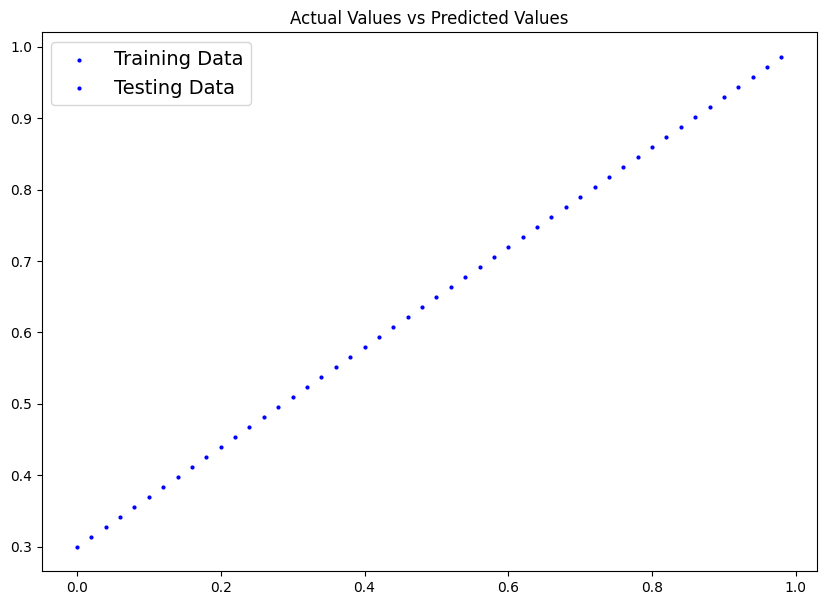

In [7]:
plot_prediction()

#### <b> Building the Neural Network

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # 
                                   requires_grad=True) 

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float),
                                requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

In [9]:
#creating a random seed
torch.manual_seed(42)

#creating an instance of the model
model_0 = LinearRegressionModel()

#checking the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#list named parametrs
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
#making predictions using torch.inference_model()`
with torch.inference_mode():
    y_preds = model_0(X_test)

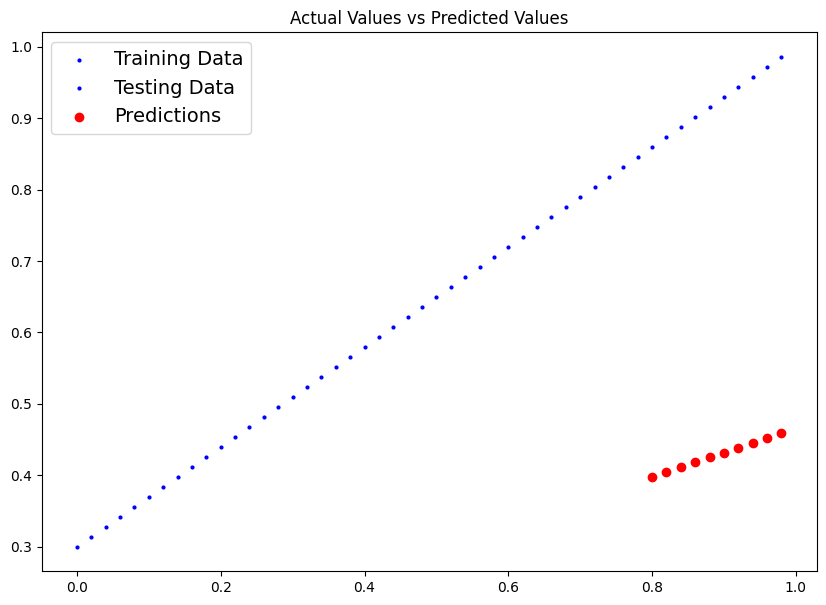

In [12]:
plot_prediction(predictions=y_preds)

Due to the randomly selected values for weights and bias so the model is making random predictions.

##### <b>Full DL Model Training</b>
1. The idea is for the model to mve froma  poor represenation of the data to a btter representaion of the data.
2. We nned to measure how poorly our model is doing by using a loss function

##### <b>Things we need to train</b>
1. Loss Function ``` Measures how well or model is working ```
2. Optimizer --> ``` Takes the loss of the model and adjust the parametrs (weights & bias) to imporve the loss function ```

For Pytorch we need a training loop and a testing loop.

In [13]:
#setup a loss function
loss_fn = nn.L1Loss()


#setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01) #lr learning rate

##### <b>Building a Traning and Test Loop in Pytorch</b>

1. ```Loop through the data ```
2. ```Implement a Forward Pass (Left to right)``` also called a Forward Propagation inorder to make predictions on data.
3. Calculate the loss (compare forward pass predictions t0 ground truth lables).
4. Loss Backward -- ``` Back Propagation ``` to calculate the gradients of each of the paramters of our model with respect to the loss.
5. Optimizer Step

In [14]:
train_loss_values = []
test_loss_values = []
epoch_count = []

In [15]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


In [16]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [17]:
weight, bias

(0.7, 0.3)

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

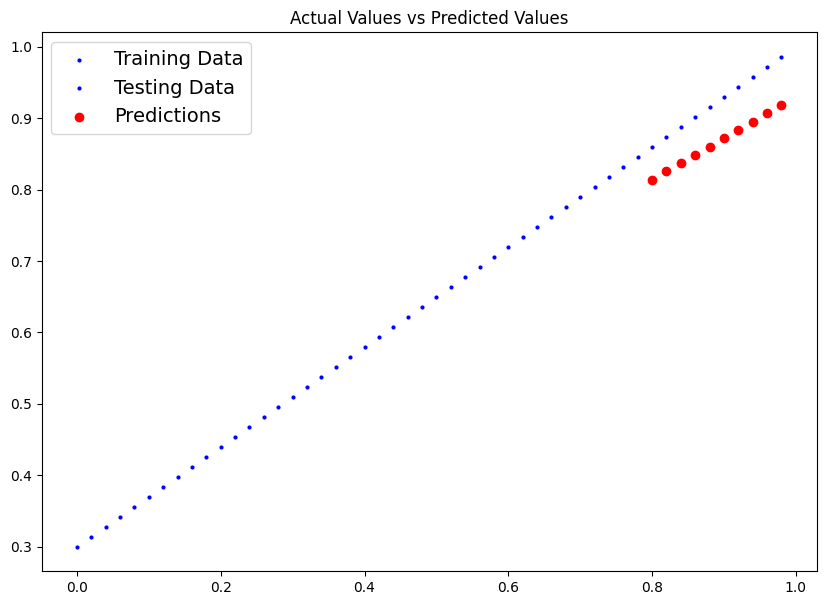

In [19]:
#displaying the lactual values against predicted values
plot_prediction(predictions=y_preds_new)

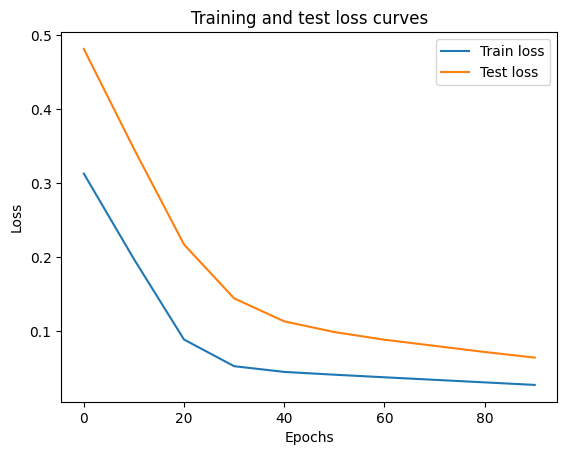

In [20]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Saving a model in Pytorch

1. ``` torch.save() -- > Allows you to save the Pytorch model in Python Pickle Format```
2. ``` torch.load() -- > Alllows you load a saved model Pytorch Object.```
3. ``` torch.nn.Modeul.load_state_dict() -- allows you to load a model's saved state dictionary```

In [48]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

#### <b> Saving the Model </b>

In [30]:
#saving our pytorch model
from pathlib import Path

#1. Creating a model directory
MODEL_PATH= Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


#2. Create a Model Save Path
MODEL_NAME = 'Model_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#saving model satae dict
print(f'Saving model to : {MODEL_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models


#### <b>Loading the Saved Model </b>

In [31]:
#loading the model
loaded_model_0 = LinearRegressionModel()

#adding the saved dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [35]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [39]:
y_preds_new

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [42]:
loaded_model_0_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])